                     t          a         b         c         d             e
2023-03-19 00:00   0.0  45.539421  0.002465  0.000373  0.000035 -7.766226e-07
2023-03-20 00:00  24.0  45.266203  0.027186  0.000129  0.000006 -9.438055e-08
2023-03-21 00:00  48.0  51.215927 -0.424679  0.012877 -0.000152  6.290633e-07


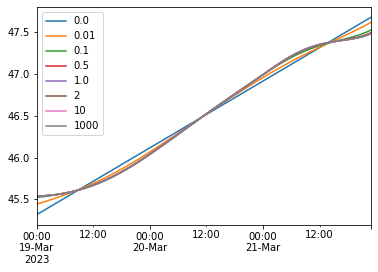

In [6]:
from curves import max_smooth_interp
import pandas as pd

intercept = 45.7
daily_slope = 0.8
num_curve_points = 3

daily_index = pd.period_range(start='2023-03-19', periods = num_curve_points, freq='D')
daily_prices = [intercept + daily_slope * i for i in range(num_curve_points)]
daily_curve = pd.Series(data=daily_prices, index=daily_index)

tensions = [0.0, 0.01, 0.1, 0.5, 1.0, 2, 10, 1000]

for tension in tensions:
    hourly_curve, solved_params = max_smooth_interp(daily_curve, freq='H', tension=tension, back_1st_deriv=daily_slope/24.0)
    ax = hourly_curve.plot(legend=True)

ax.legend(tensions)
print(params)